<div class="alert alert-info"> <b>
    In this project I will be working on store ICE's Data who is selling video games worldwide, I will look for different distribuations of the data and try to explore where are the factors that makes the games a good game or a bad one. 
    will load the data fix data types of the columns where needed, fill in missing values if its necessary and will add some informative columns for the data so it will be easier to look at the data with the whole information.

 <div class="alert alert-info"> <b>
 In front of you is data going back to 2016, the dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats as st
import seaborn as sns
from functools import reduce
import datetime
import math
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
#reading the data and saving it
games = pd.read_csv('/datasets/games.csv')

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-info"> <b>
    here I printed an info summary about the data and it includes 13 columns and 16715 entries. 
    there are some issues like missing values in some columns (year_of_release, critic_score, user_score and rating). 
    also there are some columns types need to be changed.
    will fix the issues and continue.

In [3]:
#printing a sample of the first\last rows of the data.
games.head()
games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [4]:
games.describe()

games.describe(include='object')

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


<div class="alert alert-info"> <b>
we can see here the higher platform usage which is PS2 and the higher use of the game Need for Speed.
showed some info about the categorical columns.

In [5]:
#renaming the columns to lowercase
games = games.rename(str.lower,axis='columns')
games.query('name == "Super Mario Bros."')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
201,Super Mario Bros.,GB,1999.0,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN


<div class="alert alert-info"> <b>
    changed all columns names to lowercase.

In [6]:
#checking for duplicates in the data
games.duplicated().sum()

0

<div class="alert alert-info"> <b>
no duplicates found 

In [7]:
# adding total sales per each game in all areas
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [8]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# user_score column

In [9]:
# replacing missing values in user_score column
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = games['user_score'].astype(float)
#games['user_score'] = games.groupby(['name'])['user_score'].apply(lambda x: x.fillna(x.mode().median()))
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


<div class="alert alert-info"> <b>
    
    I decided to keep them as they is after I read your reply on it, it makes more sense that we can't guess what would be the user rating or critic score if it's not founded, hope it's better now.

<div class="alert alert-info"> <b>
    replaced missing values in user_score column with the mean user score by its the games genre and changed the column type to float so it will match the data type of ratings.

# critic_score column

In [10]:
#replacing missing values in critic_score column
# games['critic_score'] = games['critic_score'].replace('tbd', np.nan)
games['critic_score'] = games['critic_score'].astype(float)
#games['critic_score'] = games.groupby(nknown')'genre', sort=False)['critic_score'].apply(lambda x: x.fillna(x.median()))
games.head()
games.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


<div class="alert alert-info"> <b>
replaced missing values in critic_score column with the mean critic score by its the games genre and changed the data type of the column.

# Name column

In [11]:
games.query('name != name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [12]:
games.dropna(subset=['name'], inplace=True)

In [13]:
games['name'].isnull().sum()

0

In [14]:
games['name'].describe()

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object

# Platform column

In [15]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [16]:
games['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

<div class="alert alert-info"> <b>
    here we can see that the PS2 platform is with highest count platform use.

# year_of_release column

In [17]:
games['year_of_release'].isnull().sum()

269

In [18]:
games.query('year_of_release.isnull()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53


In [19]:
games['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [20]:

games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


<div class="alert alert-info"> <b>
    
I decided to leave the year_of_release column as it is because there are no much data missing here.

<div class="alert alert-info"> <b>
    It doesnt look like that the missing values in the year_of_release column is related to another missing values in other columns

  <div class="alert alert-info"> <b>
  I decided to fill the missing values in the year_of_release columns with (2008) because there aren't much rows with missing values, it will be easier for calculation and give a better look on the data

# Genre column

In [21]:
games.dropna(subset=['genre'], inplace=True)
games['genre'].isnull().sum()

0

In [22]:
games['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [23]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


<div class="alert alert-info"> <b>
    we can see the most leading game genre is 'Action' then 'sports'
    I decided to fill in the two missing value with other. maybe those games were release and immediately stopped publishing the games or something went wrong.

<div class="alert alert-info"> <b>
    I decided not to fill in the missing values in rating, user_score, critic_score columns because I think it wouldn't be such right thing to do. 
    maybe those missing values in rating and other columns is there because the games were published for a very short time and there were no reviews or ratings, 

<div class="alert alert-info"> <b>
    
    I filled in the available missing values in the rating column, before it was 6764 values and after the filling its 6327 values, for the others will fill them with other also to avoid problems with calculation later in the project.
    hope its okay now :)

In [24]:
# games['rating'] = games['rating'].replace('tbd', np.nan)
games['rating'] = games['rating'].fillna('unknown')

# Analyzing Data

**Look at how many games were released in different years. Is the data for every period significant?**

In [25]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


In [26]:
# years_names = games.query('year_of_release != "unknown"')
years_names = games[['year_of_release', 'name']].groupby(['year_of_release']).count().sort_values(by='year_of_release', ascending=False).reset_index()

years_names.head()

,year_of_release,name
0,2016.0,502
1,2015.0,606
2,2014.0,581
3,2013.0,544
4,2012.0,653


<div class="alert alert-info"> <b>
    here we can see the counts for games per every year, we can say for sure that the more increasing years of release the more games were published.

<AxesSubplot:xlabel='year_of_release'>

Text(0.5, 1.0, 'year of release')

Text(0.5, 0, 'year_of_release')

Text(0, 0.5, 'amount')

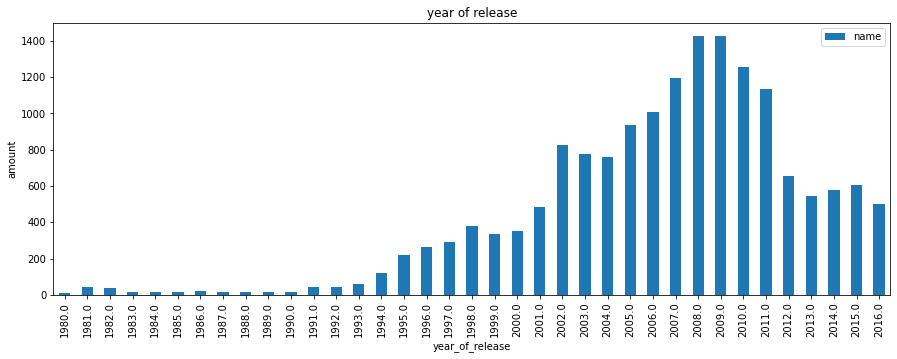

In [27]:
years_pivot = games.pivot_table(index='year_of_release',values='name', aggfunc='count')


years_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('year of release')
plt.xlabel('year_of_release')
plt.ylabel('amount')
plt.show()


<div class="alert alert-info"> <b>
    we can see that data before 1995 is not serious about releasing the games, I wouldn't say that data for every period is significant.
    there was a huge number of games release on 2008-2009 comparative to other years released.
    and after 2011 there was a drop in the gaming development industry 

**Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year.**

In [28]:
platform_sales = games[['platform', 'total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()
platform_sales

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


** Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade? **

In [29]:
#calculating platform age
wanted_platform = games[games['year_of_release'] >= 2014]
platform_age = wanted_platform.groupby(['platform'])['year_of_release'].agg(['min','max'])
platform_age['age'] = platform_age['max'] - platform_age['min']
median = platform_age['age'].median()

platform_age.sort_values(by='min').reset_index()
print(f'The average platform\'s age is:{median}')

,platform,min,max,age
0,3DS,2014.0,2016.0,2.0
1,PC,2014.0,2016.0,2.0
2,PS3,2014.0,2016.0,2.0
3,PS4,2014.0,2016.0,2.0
4,PSP,2014.0,2015.0,1.0
5,PSV,2014.0,2016.0,2.0
6,Wii,2014.0,2016.0,2.0
7,WiiU,2014.0,2016.0,2.0
8,X360,2014.0,2016.0,2.0
9,XOne,2014.0,2016.0,2.0


The average platform's age is:2.0


<AxesSubplot:xlabel='platform'>

Text(0.5, 1.0, 'platforms')

Text(0.5, 0, 'platform')

Text(0, 0.5, 'amount')

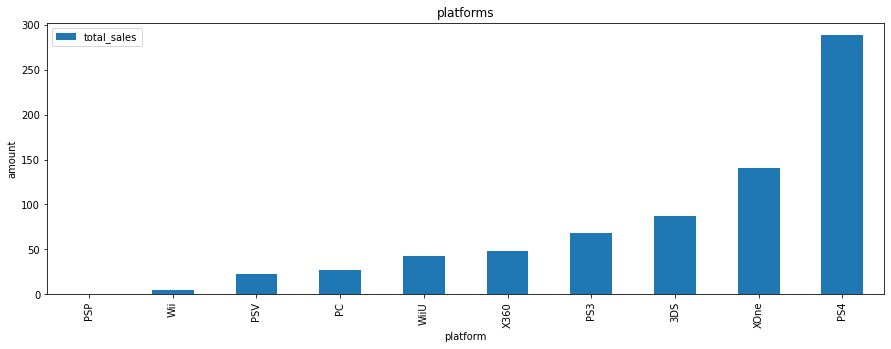

In [31]:
platforms_pivot = wanted_platform.pivot_table(index='platform',values='total_sales', aggfunc='sum').sort_values(by='total_sales')


platforms_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('platforms')
plt.xlabel('platform')
plt.ylabel('amount')
plt.show()

** Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017**

In [32]:
wanted_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98


<div class="alert alert-info"> <b>
    I would take data for games were released above 2008 and with the ten leading platforms we saw it in the distribution before.

** Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade **

In [33]:
#showing revenue for each platform per year
yearss_pivot = wanted_platform.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)
yearss_pivot

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014.0,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


<div class="alert alert-info"> <b>
    here I showed a table includes the year of release as the index and the platfroms as columns, the table shows the revenue for each platfrom per each year beggining from 2010 untill 2016. 
    we can see a few platforms that looks so potential like PS4 and XONE, also a platforms that their revenue almost disappeared with the years like PSP and DS.

In [34]:
#changing in the revenue for each platform per a year.
wantedd = yearss_pivot.shift(+1)

wanted2 = yearss_pivot - wantedd
wanted2

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015.0,-15.98,-4.76,-30.94,18.90,-0.12,-5.65,-2.61,-5.68,-22.78,6.07
2016.0,-12.64,-3.27,-13.22,-49.65,-0.12,-2.00,-0.96,-11.75,-10.44,-33.99


<div class="alert alert-info"> <b>
    this second table is showing the revenue change for each platfrom per year, for example we can see the revenue drop of 3DS platform after 2013.

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='platform', ylabel='year_of_release'>

Text(0.5, 1.0, "Platform's lifetime")

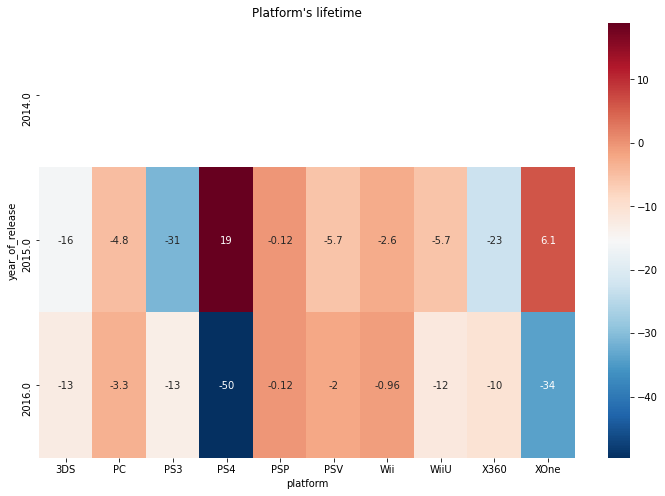

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(wanted2, cmap='RdBu_r', annot=True)
plt.title('Platform\'s lifetime')
plt.show()

<div class="alert alert-info"> <b>
    a distribution about revenue changing for each platform per year, platform with zeros in 2016 already faded like PS2 and DS. 
    platform we should look at with our campaign are those who still got a values in 2016, that means that they are still alive even if their was a drop in their revenue that doesn't guarantee that they are not profitable.

**Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings**

In [36]:
#grouping every name(game) with it's platform and total sales
grouped_sales = wanted_platform.groupby(['platform', 'name'])['total_sales'].sum().reset_index()
grouped_sales

,platform,name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Haikyu!! Cross Team Match!,0.04
3,3DS,12-Sai. Honto no Kimochi,0.07
4,3DS,12-Sai. Koisuru Diary,0.05
...,...,...,...
1684,XOne,Wolfenstein: The Old Blood,0.15
1685,XOne,Worms: WMD,0.01
1686,XOne,XCOM 2,0.04
1687,XOne,ZombiU,0.01


<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

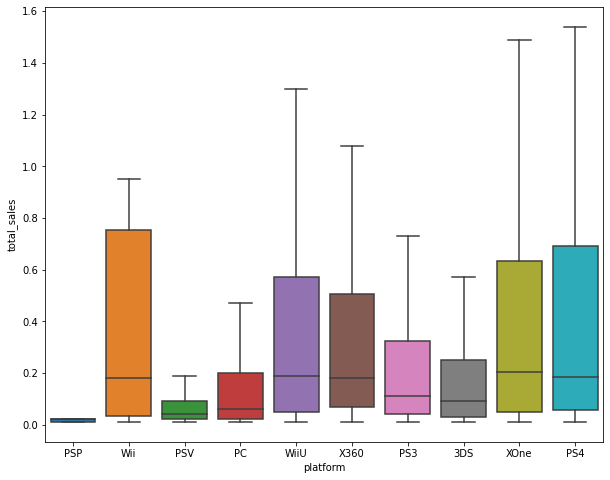

In [38]:
sorting = grouped_sales.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales')['platform']

plt.figure(figsize=(10,8))
sns.boxplot(x='platform', y='total_sales', data=grouped_sales,order=sorting, showfliers=False)

<div class="alert alert-info"> <b>
    boxplot shows the difference in the average revenue between every platform
    we can see that the highest average revenue is in PS3, X360 and the PS4 those are the platforms with the higher revenue average.

** Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.**

In [39]:
wanted_rating_platform = wanted_platform.query('platform == "PS3"')
wanted_rating_platform.head()

wanted_rating_platform.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
180,Minecraft,PS3,2014.0,Misc,2.03,2.37,0.00,0.87,NaN,NaN,unknown,5.27
255,Call of Duty: Advanced Warfare,PS3,2014.0,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M,4.36
264,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
552,FIFA 16,PS3,2015.0,Sports,0.41,1.84,0.05,0.40,NaN,3.2,E,2.70
1021,Watch Dogs,PS3,2014.0,Action,0.56,0.81,0.10,0.27,NaN,5.1,M,1.74


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16558,Naruto Shippuden: Ultimate Ninja Storm Collection,PS3,2016.0,Action,0.0,0.01,0.00,0.0,NaN,NaN,unknown,0.01
16638,Tour de France 2014,PS3,2014.0,Sports,0.0,0.01,0.00,0.0,NaN,NaN,E,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014.0,Action,0.0,0.01,0.00,0.0,NaN,NaN,unknown,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,0.0,0.00,0.01,0.0,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.0,0.00,0.01,0.0,NaN,NaN,unknown,0.01


<div class="alert alert-info"> <b>
    after printing the head and the tail of our table we can see how the total sales was high for the PS3 platform when the user score and critic score were high too, we can see it in first five games of our table. 
    the same time with the last five games while the total sales dicreased with large drop while the user score and critic score also were low.

array([[<AxesSubplot:xlabel='year_of_release', ylabel='year_of_release'>,
        <AxesSubplot:xlabel='na_sales', ylabel='year_of_release'>,
        <AxesSubplot:xlabel='eu_sales', ylabel='year_of_release'>,
        <AxesSubplot:xlabel='jp_sales', ylabel='year_of_release'>,
        <AxesSubplot:xlabel='other_sales', ylabel='year_of_release'>,
        <AxesSubplot:xlabel='critic_score', ylabel='year_of_release'>,
        <AxesSubplot:xlabel='user_score', ylabel='year_of_release'>,
        <AxesSubplot:xlabel='total_sales', ylabel='year_of_release'>],
       [<AxesSubplot:xlabel='year_of_release', ylabel='na_sales'>,
        <AxesSubplot:xlabel='na_sales', ylabel='na_sales'>,
        <AxesSubplot:xlabel='eu_sales', ylabel='na_sales'>,
        <AxesSubplot:xlabel='jp_sales', ylabel='na_sales'>,
        <AxesSubplot:xlabel='other_sales', ylabel='na_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='na_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='na_sales'>,
        

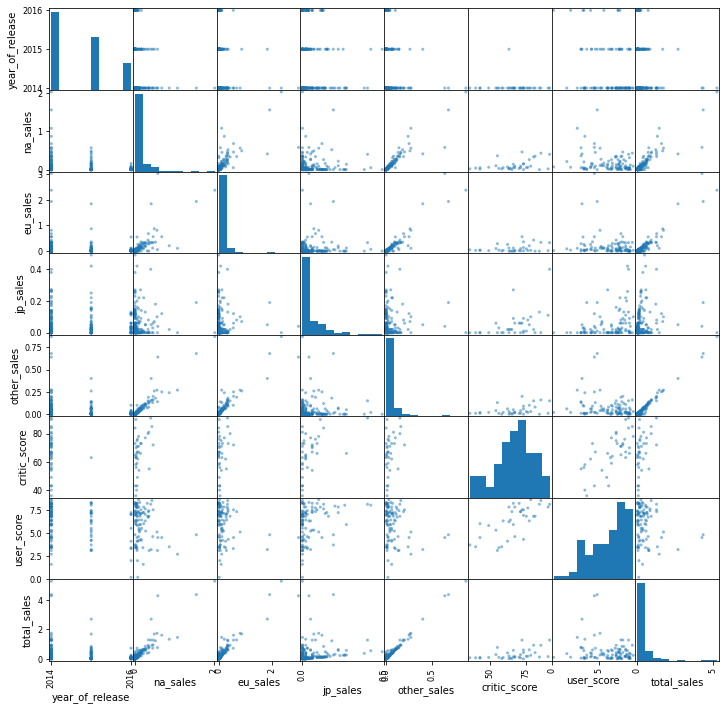

In [40]:
wanted_rating_platform1 = wanted_rating_platform.pivot_table(index ='platform',values = 'total_sales').sum().reset_index()
pd.plotting.scatter_matrix(wanted_rating_platform, figsize=(12,12))


In [41]:
wanted_platform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(8), object(4)
memory usage: 236.1+ KB


In [43]:
wanted_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98


<AxesSubplot:>

Text(0.5, 1.0, 'sales per genre')

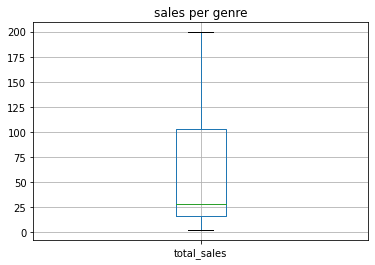

In [44]:
overall_sum_mean = wanted_platform.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
overall_sum_mean.boxplot('total_sales')
plt.title('sales per genre')
plt.show()

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='genre', ylabel='total_sales'>

Text(0.5, 1.0, 'sales per genre')

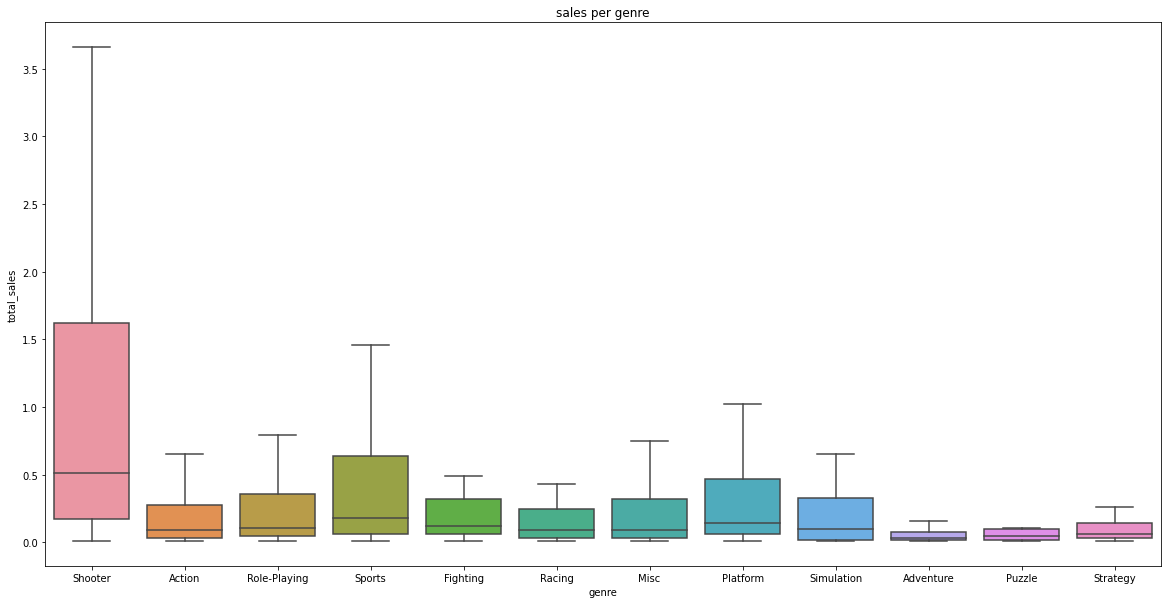

In [45]:
plt.figure(figsize=(20,10))
sns.boxplot(x='genre', y='total_sales', data=wanted_platform, showfliers=False)
plt.title('sales per genre')
plt.show()

we can see that shooter and sports genres are leading with their total sales, for others we can see that total sales for them are moving between 0.5-1.0 on y axis, they dont have same total sales but pretty close with some genres

In [46]:
#top five platform for each region 
na_region_sales = wanted_platform.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)

eu_region_sales = wanted_platform.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)

jp_region_sales = wanted_platform.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)

other_region_sales = wanted_platform.groupby('platform')['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending=False)

##pivots
platforms_na_pivot = wanted_platform.pivot_table(index='platform',values='na_sales', aggfunc='sum').sort_values(by='na_sales')
platforms_eu_pivot = wanted_platform.pivot_table(index='platform',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales')
platforms_jp_pivot = wanted_platform.pivot_table(index='platform',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales')
platforms_other_pivot = wanted_platform.pivot_table(index='platform',values='other_sales', aggfunc='sum').sort_values(by='other_sales')

,platform,na_sales
3,PS4,98.61
9,XOne,81.27
8,X360,28.30
0,3DS,22.64
2,PS3,22.05


<AxesSubplot:xlabel='platform'>

Text(0.5, 1.0, 'north america platforms')

Text(0.5, 0, 'platform')

Text(0, 0.5, 'amount')

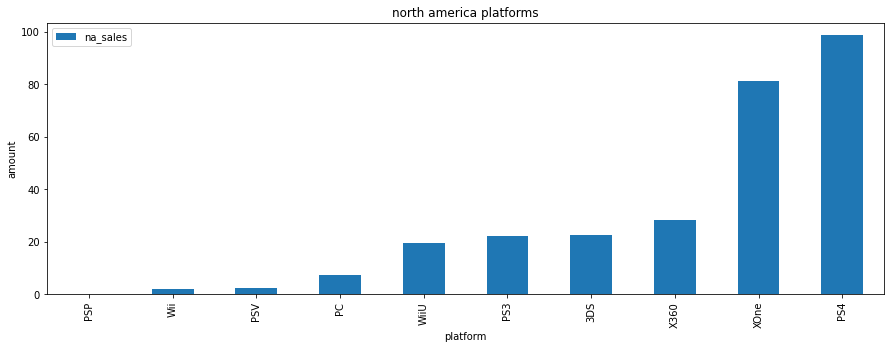

In [47]:
#north america platforms
na_region_sales.head()
platforms_na_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('north america platforms')
plt.xlabel('platform')
plt.ylabel('amount')
plt.show()

,platform,eu_sales
3,PS4,130.04
9,XOne,46.25
2,PS3,25.54
1,PC,17.97
0,3DS,16.12


<AxesSubplot:xlabel='platform'>

Text(0.5, 1.0, 'europe platforms')

Text(0.5, 0, 'platform')

Text(0, 0.5, 'amount')

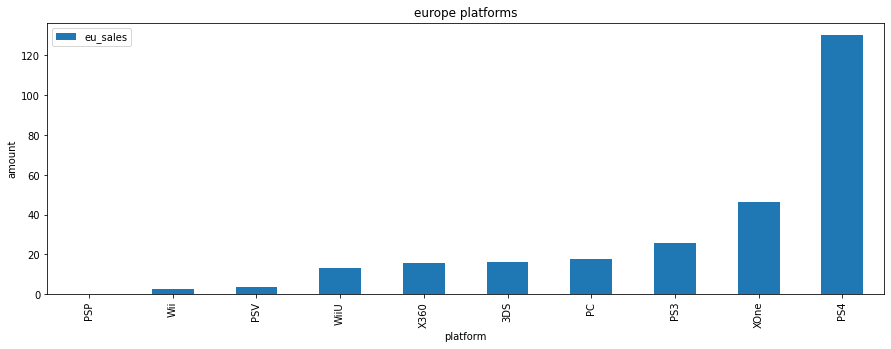

In [48]:
##europe platforms
eu_region_sales.head()
platforms_eu_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('europe platforms')
plt.xlabel('platform')
plt.ylabel('amount')
plt.show()

,platform,jp_sales
0,3DS,44.24
3,PS4,15.02
5,PSV,14.54
2,PS3,11.22
7,WiiU,7.31


<AxesSubplot:xlabel='platform'>

Text(0.5, 1.0, 'japan platforms')

Text(0.5, 0, 'platform')

Text(0, 0.5, 'amount')

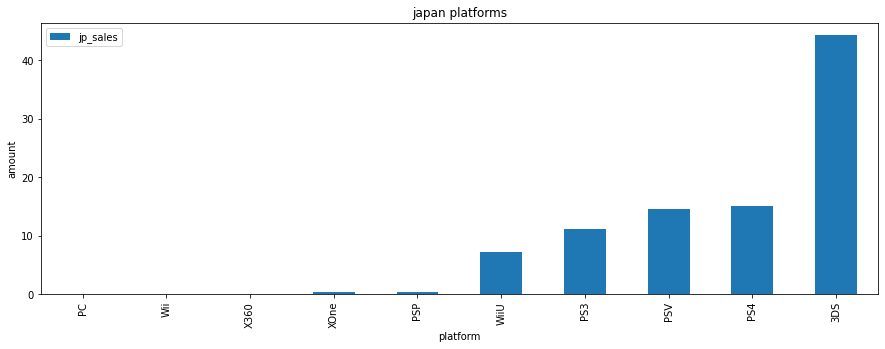

In [49]:
#japan platforms
jp_region_sales.head()
platforms_jp_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('japan platforms')
plt.xlabel('platform')
plt.ylabel('amount')
plt.show()

,platform,other_sales
3,PS4,44.48
9,XOne,12.52
2,PS3,9.37
8,X360,4.35
0,3DS,3.68


<AxesSubplot:xlabel='platform'>

Text(0.5, 1.0, 'other regions platforms')

Text(0.5, 0, 'platform')

Text(0, 0.5, 'amount')

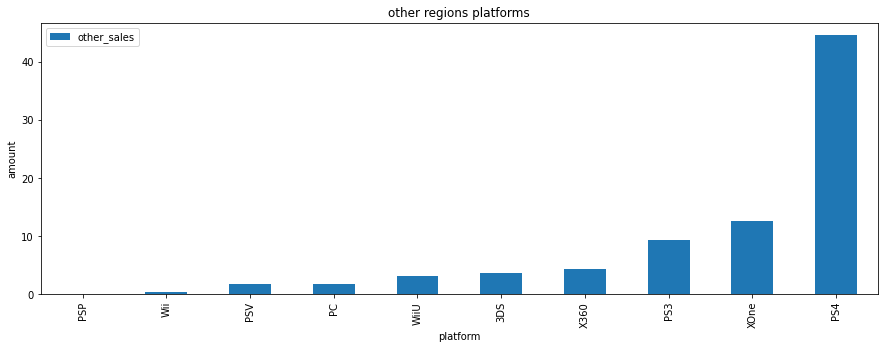

In [50]:
##other regions platforms
other_region_sales.head()
platforms_other_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('other regions platforms')
plt.xlabel('platform')
plt.ylabel('amount')
plt.show()

<div class="alert alert-info"> <b>
    four distributions for the top five platforms for each region. 
    we can see that the platform PS3 is top one in other regions and europe region.
    WI platform is top two in north america region while its top five in japan sales with much less total revenue.
    for others its dynamic in all regions.

In [51]:
na_region_genre = wanted_platform.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)

eu_region_genre = wanted_platform.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)

jp_region_genre = wanted_platform.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)

other_region_genre = wanted_platform.groupby('genre')['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending=False)


##genres pivots
genres_na_pivot = wanted_platform.pivot_table(index='genre',values='na_sales', aggfunc='sum').sort_values(by='na_sales')
genres_eu_pivot = wanted_platform.pivot_table(index='genre',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales')
genres_jp_pivot = wanted_platform.pivot_table(index='genre',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales')
genres_others_pivot = wanted_platform.pivot_table(index='genre',values='other_sales', aggfunc='sum').sort_values(by='other_sales')

,genre,na_sales
8,Shooter,79.02
0,Action,72.53
10,Sports,46.13
7,Role-Playing,33.47
3,Misc,15.05


<AxesSubplot:xlabel='genre'>

Text(0.5, 1.0, 'north america genres')

Text(0.5, 0, 'genre')

Text(0, 0.5, 'amount')

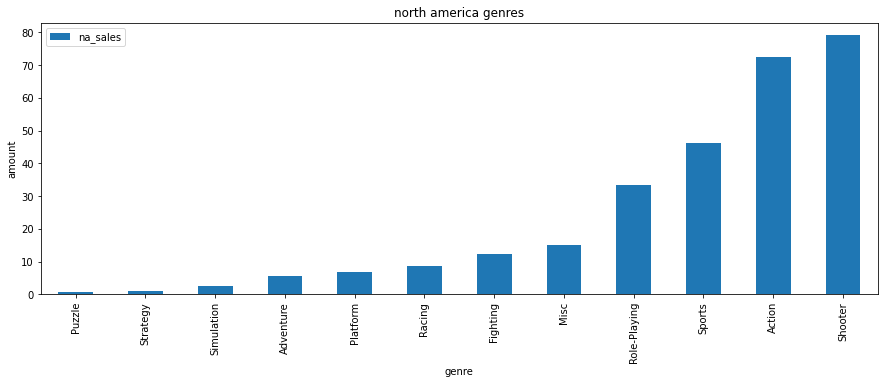

In [52]:
##north america genres
na_region_genre.head()
genres_na_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('north america genres')
plt.xlabel('genre')
plt.ylabel('amount')
plt.show()

,genre,eu_sales
0,Action,74.68
8,Shooter,65.52
10,Sports,45.73
7,Role-Playing,28.17
6,Racing,14.13


<AxesSubplot:xlabel='genre'>

Text(0.5, 1.0, 'europe genres')

Text(0.5, 0, 'genre')

Text(0, 0.5, 'amount')

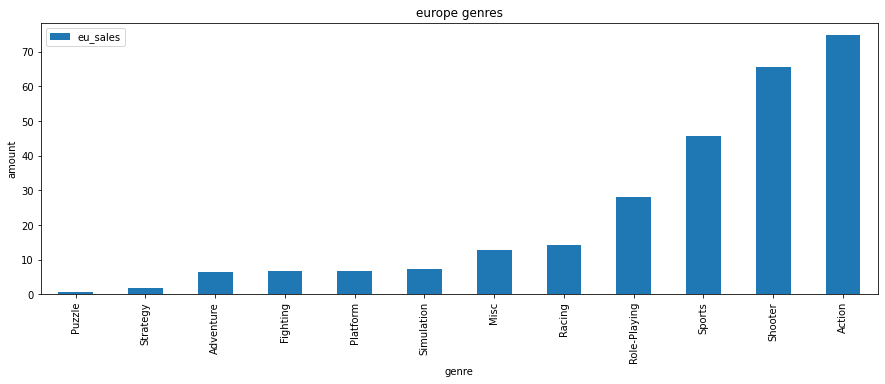

In [53]:
##europe genres
eu_region_genre.head()
genres_eu_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('europe genres')
plt.xlabel('genre')
plt.ylabel('amount')
plt.show()

,genre,jp_sales
7,Role-Playing,31.16
0,Action,29.58
2,Fighting,6.37
3,Misc,5.61
8,Shooter,4.87


<AxesSubplot:xlabel='genre'>

Text(0.5, 1.0, 'japan genres')

Text(0.5, 0, 'genre')

Text(0, 0.5, 'amount')

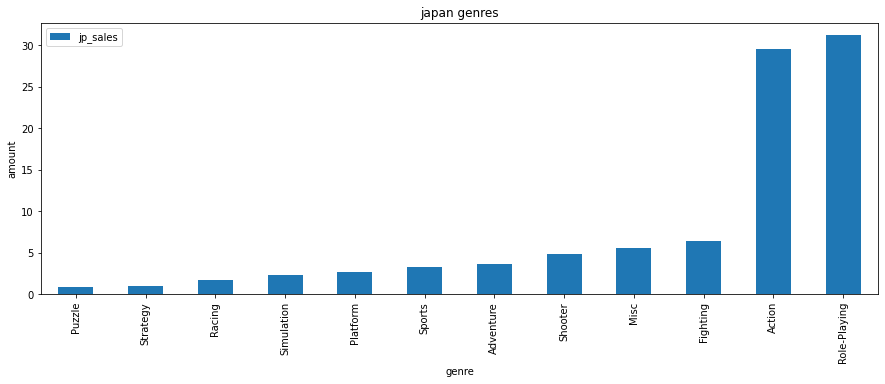

In [54]:
##japan genres
jp_region_genre.head()
genres_jp_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('japan genres')
plt.xlabel('genre')
plt.ylabel('amount')
plt.show()

,genre,other_sales
0,Action,22.57
8,Shooter,21.53
10,Sports,14.36
7,Role-Playing,8.64
3,Misc,4.03


<AxesSubplot:xlabel='genre'>

Text(0.5, 1.0, 'other regions genres')

Text(0.5, 0, 'genre')

Text(0, 0.5, 'amount')

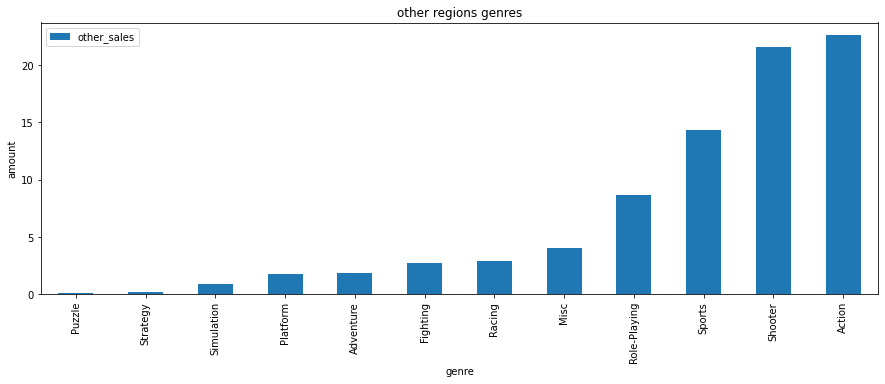

In [55]:
##other regions genres
other_region_genre.head()
genres_others_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('other regions genres')
plt.xlabel('genre')
plt.ylabel('amount')
plt.show()

<div class="alert alert-info"> <b>
    a distribution showing the top five genres grouped by revenues for each genre. 
    its obvious that "Action" genre is almsot leading the five regions areas. 

In [56]:
na_region_rating = wanted_platform.groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)

eu_region_rating = wanted_platform.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)

jp_region_rating = wanted_platform.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)

other_region_rating = wanted_platform.groupby('rating')['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending=False)


##rating pivots
rating_na_pivot = wanted_platform.pivot_table(index='rating',values='na_sales', aggfunc='sum').sort_values(by='na_sales')
rating_eu_pivot = wanted_platform.pivot_table(index='rating',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales')
rating_jp_pivot = wanted_platform.pivot_table(index='rating',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales')
rating_others_pivot = wanted_platform.pivot_table(index='rating',values='other_sales', aggfunc='sum').sort_values(by='other_sales')

,rating,na_sales
2,M,96.42
4,unknown,64.72
0,E,50.74
3,T,38.95
1,E10+,33.23


<AxesSubplot:xlabel='rating'>

Text(0.5, 1.0, 'north america ratings')

Text(0.5, 0, 'rating')

Text(0, 0.5, 'amount')

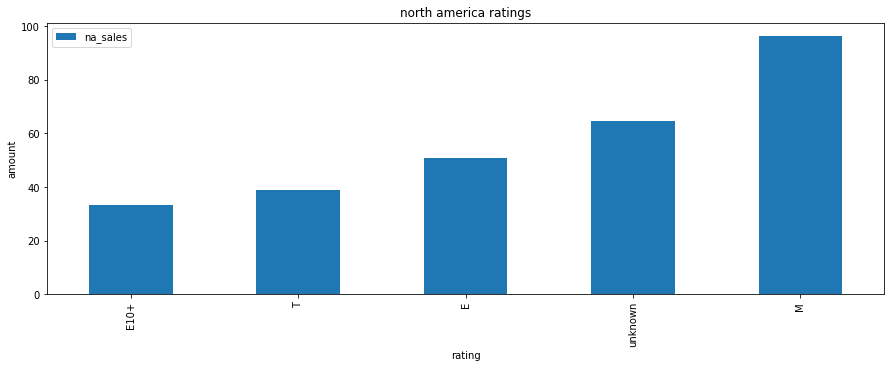

In [57]:
#north america ratings
na_region_rating.head()
rating_na_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('north america ratings')
plt.xlabel('rating')
plt.ylabel('amount')
plt.show()

,rating,eu_sales
2,M,93.44
4,unknown,58.95
0,E,58.06
3,T,34.07
1,E10+,26.16


<AxesSubplot:xlabel='rating'>

Text(0.5, 1.0, 'europe ratings')

Text(0.5, 0, 'rating')

Text(0, 0.5, 'amount')

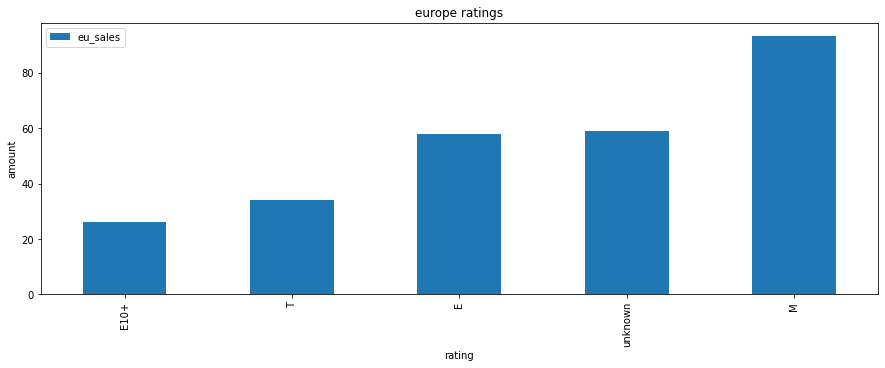

In [58]:
#europe ratings
eu_region_rating.head()
rating_eu_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('europe ratings')
plt.xlabel('rating')
plt.ylabel('amount')
plt.show()

,rating,jp_sales
4,unknown,56.90
3,T,14.78
0,E,8.94
2,M,8.01
1,E10+,4.46


<AxesSubplot:xlabel='rating'>

Text(0.5, 1.0, 'japan ratings')

Text(0.5, 0, 'rating')

Text(0, 0.5, 'amount')

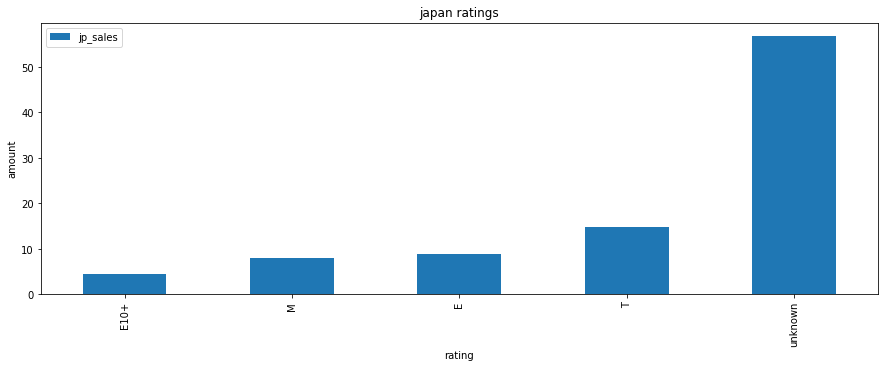

In [59]:
#japan ratings
jp_region_rating.head()
rating_jp_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('japan ratings')
plt.xlabel('rating')
plt.ylabel('amount')
plt.show()

,rating,other_sales
2,M,28.67
4,unknown,18.40
0,E,15.39
3,T,11.33
1,E10+,7.83


<AxesSubplot:xlabel='rating'>

Text(0.5, 1.0, 'other regions ratings')

Text(0.5, 0, 'rating')

Text(0, 0.5, 'amount')

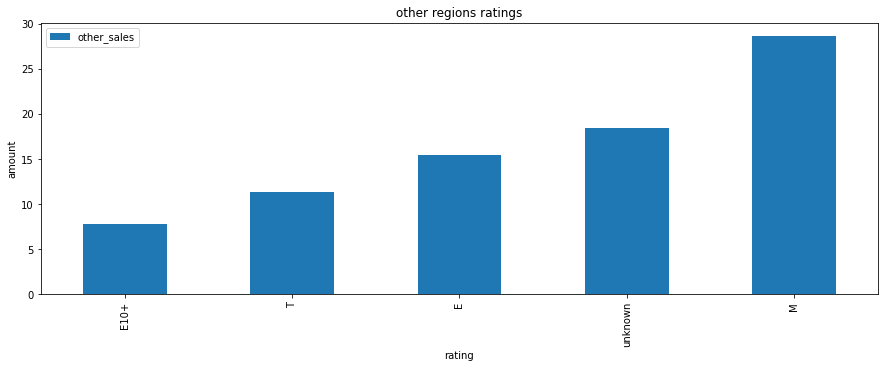

In [60]:
#other regions ratings
other_region_rating.head()
rating_others_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('other regions ratings')
plt.xlabel('rating')
plt.ylabel('amount')
plt.show()

<div class="alert alert-info"> <b>
the E rating is top one in all areas, with a very good revenues from those rates in north america area.

# Hypotheses

Average user ratings of the Xbox One and PC platforms are the same.

<div class="alert alert-info"> <b>
    H0: for the first hypothese I assumed that the null hypotheses will be that the average rating from both Xbox users and PC users will be the same 

<div class="alert alert-info"> <b>
H1: while the alternative hypotheses will be that the average rating from both platforms users will be different. 
    the hypotheses will be rejected with p-value smaller than our alpha.

In [61]:
#user_score
user_scores_unique = wanted_platform.query('user_score != "NaN"')
user_scores_unique['user_score'].mean()
filling = user_scores_unique['user_score'].mean()
wanted_platform.loc[:, 'user_score'] = wanted_platform['user_score'].astype(float)
wanted_platform['user_score'] = wanted_platform['user_score'].fillna(filling)

#critic_score
user_scores_unique1 = wanted_platform.query('critic_score != "NaN"')
user_scores_unique1['critic_score'].mean()
filling1 = user_scores_unique1['critic_score'].mean()
wanted_platform.loc[:, 'critic_score'] = wanted_platform['critic_score'].astype(float)
wanted_platform['critic_score'] = wanted_platform['critic_score'].fillna(filling1)

6.623536036036036

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/tmp/ipykernel_376/2694988503.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wanted_platform['user_score'] = wanted_platform['user_score'].fillna(filling)


72.30640668523677

/tmp/ipykernel_376/2694988503.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wanted_platform['critic_score'] = wanted_platform['critic_score'].fillna(filling1)


<div class="alert alert-info"> <b>
    
    here I checked what is the mean value for user score to know with what value to fill in the missing in the filtered data so I can make the hypotheses test.

In [62]:
wanted_platform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   float64
 9   user_score       1689 non-null   float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(8), object(4)
memory usage: 236.1+ KB


In [63]:
wanted_platform['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [64]:
#getting Xbox and PC users
xbox_users = wanted_platform.query('platform == "XOne"')
pc_users = wanted_platform.query('platform == "PC"')

In [65]:
# Test the hypotheses
st.levene(xbox_users['critic_score'], pc_users['critic_score'], center='mean')

LeveneResult(statistic=0.026110477892828332, pvalue=0.87171736569163)

In [66]:
xbox_users_mean = xbox_users['user_score'].mean()

pc_users_mean = pc_users['user_score'].mean()

print('xbox users mean rating is:', xbox_users_mean)
print()
print('PC users mean rating is:', pc_users_mean)

xbox users mean rating is: 6.6025560099573255

PC users mean rating is: 6.360811556589702


In [67]:
alpha = 0.05
test = st.ttest_ind(xbox_users['user_score'], pc_users['user_score'], equal_var=False)
print(f'the P-value is:{test.pvalue}')
if test.pvalue < alpha:
    print('Reject the null hypotheses')
else:
    print('Don\'t reject the null hypotheses')

the P-value is:0.10120317946695495
Don't reject the null hypotheses


Average user ratings for the Action and Sports genres are almost the same.

<div class="alert alert-info"> <b>
H0: I chose that the null hypotheses will be the fact that the rating from both action and sports genres users will be the same.

<div class="alert alert-info"> <b>
H1: while the alternative hypotheses will be the fact that the rating from both users is different. will reject the null hypotheses with smaller p-value than our alpha(5%).

In [68]:
wanted_platform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   float64
 9   user_score       1689 non-null   float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(8), object(4)
memory usage: 236.1+ KB


In [69]:
wanted_platform['genre'].unique()

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

In [70]:
#getting wanted users
action_users = wanted_platform.query('genre == "Action"')
sports_users = wanted_platform.query('genre == "Sports"')

In [71]:
# Test the hypotheses
st.levene(action_users['user_score'], sports_users['user_score'], center='mean')

LeveneResult(statistic=144.76335219712072, pvalue=1.06293246968975e-30)

In [72]:
action_users_mean = action_users['user_score'].mean()

sports_users_mean = sports_users['user_score'].mean()

print('action users mean rating is:', action_users_mean)
print()
print('sports users mean rating is:', sports_users_mean)

action users mean rating is: 6.689303075288534

sports users mean rating is: 5.520498293324381


In [73]:
alpha = 0.05
test = st.ttest_ind(action_users['user_score'], sports_users['user_score'], equal_var=False)
print(f'the P-value is:{test.pvalue}')
if test.pvalue < alpha:
    print('Reject the null hypotheses')
else:
    print('Don\'t reject the null hypotheses')

the P-value is:4.143405930548463e-14
Reject the null hypotheses


# Overall conclusion

<div class="alert alert-info"> <b>
    in this project I worked on games data for a little store, after a first look on the dataset found that there are some issues with the data. there were missing values in user_score and critic_score columns that I filled in missing values with the mean rating of grouping by the games names to get as much as possible a spicified replaced values, for the rating columns I decided not to fill in the missing values because it not a big percentage of the data missing there. I added a new column for total revenue per each platform from different regions and areas.
    after ploting some distributions I can conclude that the most leading genre in the data is Action and we saw in some areas that defined as genre "action" users are the most profitable clients. puzzle is lowest usage games.
    concluded that at least 50% of the games were published after 2005, before this year there were a low number of games published maybe because no one then published much games or was a bad games that published for a few days then deleted or smth.
    
    
    
    